In [1]:
import os
import torch
import Self_net_architecture
import tifffile as tif
import numpy as np

from csbdeep.utils import plot_some

In [2]:
def npadrr_info(adrr: np.ndarray) -> None:
    print(f'shape: {adrr.shape} \ndtype: {adrr.dtype} \nmax: {adrr.max()} \nmin: {adrr.min()} \nmean: {adrr.mean()} \nstd: {adrr.std()}')

In [3]:
input_nc = 1
output_nc = 1
device=torch.device('cuda:0')

In [4]:
G_A=Self_net_architecture.define_G(input_nc=input_nc, output_nc=output_nc, ngf=64, netG='deblur_net', device=device,use_dropout=False,norm='instance')
G_A.load_state_dict(torch.load('/home/ryuuyou/Project/self_net/data/care_liver/checkpoint/saved_models/netG_B/60_3200.pkl'))

initialize network with normal


<All keys matched successfully>

In [5]:
xy_lr = tif.imread('/home/ryuuyou/Project/self_net/data/care_liver/raw_data/xy/1.tif')
npadrr_info(xy_lr)

shape: (128, 128) 
dtype: float32 
max: 1.0 
min: 0.0 
mean: 0.1216699481010437 
std: 0.09693342447280884


In [6]:
xy_lr = np.expand_dims(np.expand_dims(xy_lr, axis=0), axis=0)
npadrr_info(xy_lr)

shape: (1, 1, 128, 128) 
dtype: float32 
max: 1.0 
min: 0.0 
mean: 0.1216699481010437 
std: 0.09693342447280884


In [7]:
xy_lr = torch.from_numpy(xy_lr).to(device=device)

In [8]:
with torch.no_grad():
    res = G_A(xy_lr)

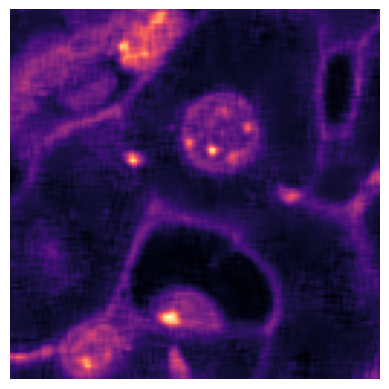

In [9]:
plot_some(res.cpu().numpy())

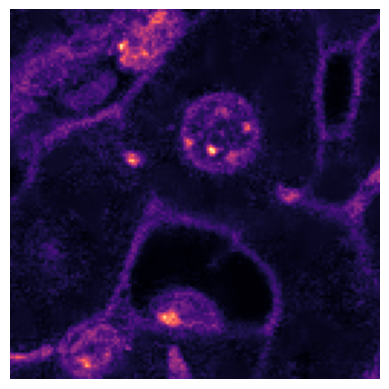

In [10]:
plot_some(xy_lr.cpu())